In [23]:
import pandas as pd

filename = '_dj_snap_data.1454698138.248183.txt'

gesture_type = pd.read_csv(filename, nrows=0).columns[0]
data = pd.read_csv(filename, skiprows = 1, delimiter = '|')
data.columns = ['ts', 'raw_accX', 'raw_accY', 'raw_accZ']
data.ix[0, :] = 0

In [24]:
print gesture_type

Snap


In [26]:
pd.rolling_apply(data, 2, lambda x: x[1] - x[0]).drop([0,1], axis = 0).describe()

,ts,raw_accX,raw_accY,raw_accZ
count,2152.000000,2152.000000,2152.000000,2152.000000
mean,0.019931,0.000061,0.000115,0.000016
std,0.000011,0.111034,0.222437,0.323255
min,0.019897,-1.163375,-2.816406,-5.447235
25%,0.019928,-0.005528,-0.008361,-0.006855
50%,0.019928,-0.000473,-0.000473,0.000435
75%,0.019928,0.005119,0.007649,0.006870
max,0.020018,1.563141,3.073273,2.962677


In [27]:
data['gravX'] = 0
data['gravY'] = 0
data['gravZ'] = 0
data['raw_accX'] *= 10
data['raw_accY'] *= 10
data['raw_accZ'] *= 10

In [28]:
a = .75

In [29]:
for idx in range(1, data.shape[0]):

    data.ix[idx, 'gravX'] = (a * data.ix[(idx - 1), 'gravX']) + ((1 - a) * data.ix[idx, 'raw_accX'])
    data.ix[idx, 'gravY'] = (a * data.ix[(idx - 1), 'gravY']) + ((1 - a) * data.ix[idx, 'raw_accY'])
    data.ix[idx, 'gravZ'] = (a * data.ix[(idx - 1), 'gravZ']) + ((1 - a) * data.ix[idx, 'raw_accZ'])

In [31]:
data['accX'] = data['raw_accX'] - data['gravX']
data['accY'] = data['raw_accY'] - data['gravY']
data['accZ'] = data['raw_accZ'] - data['gravZ']

In [33]:
data['body_magnitude'] = ((data['accX']**2) + (data['accY']**2) + (data['accZ'] ** 2)) ** .5

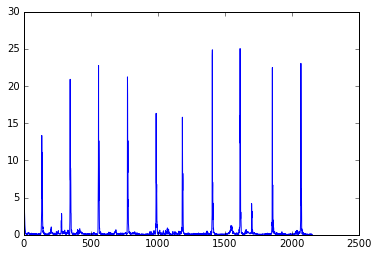

In [34]:
import matplotlib.pyplot as plt


%matplotlib inline
plt.plot(data['body_magnitude'])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

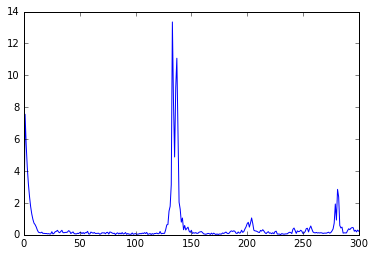

In [36]:
plt.plot(data.ix[:300, 'body_magnitude'])

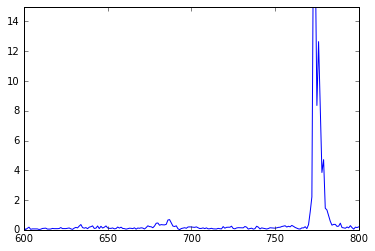

In [37]:
plt.ylim(0, 15)
plt.plot(data.ix[600:800, 'body_magnitude'])

In [38]:
data = data.drop(['body_magnitude'], axis = 1)

In [39]:
data.head()

,ts,raw_accX,raw_accY,raw_accZ,gravX,gravY,gravZ,accX,accY,accZ
0,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19308.473259,0.60196,-0.79300,-10.03098,0.150490,-0.198250,-2.507745,0.451470,-0.594750,-7.523235
2,19308.493187,0.59143,-0.88120,-9.99680,0.260725,-0.368987,-4.380009,0.330705,-0.512212,-5.616791
3,19308.513115,0.62622,-0.80811,-9.95758,0.352099,-0.478768,-5.774402,0.274121,-0.329342,-4.183178
4,19308.533043,0.56808,-0.74371,-9.98611,0.406094,-0.545004,-6.827329,0.161986,-0.198706,-3.158781


In [40]:
data = data[['ts', 'accX', 'accY', 'accZ', 'gravX', 'gravY', 'gravZ', 'raw_accX', 'raw_accY', 'raw_accZ']] 

In [41]:
data.head()

,ts,accX,accY,accZ,gravX,gravY,gravZ,raw_accX,raw_accY,raw_accZ
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
1,19308.473259,0.451470,-0.594750,-7.523235,0.150490,-0.198250,-2.507745,0.60196,-0.79300,-10.03098
2,19308.493187,0.330705,-0.512212,-5.616791,0.260725,-0.368987,-4.380009,0.59143,-0.88120,-9.99680
3,19308.513115,0.274121,-0.329342,-4.183178,0.352099,-0.478768,-5.774402,0.62622,-0.80811,-9.95758
4,19308.533043,0.161986,-0.198706,-3.158781,0.406094,-0.545004,-6.827329,0.56808,-0.74371,-9.98611


In [42]:
data.columns = ['ts', 'accX', 'accY', 'accZ', 'gravX', 'gravY', 'gravZ', 'gyroX', 'gyroY', 'gyroZ']

In [43]:
data.head()

,ts,accX,accY,accZ,gravX,gravY,gravZ,gyroX,gyroY,gyroZ
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
1,19308.473259,0.451470,-0.594750,-7.523235,0.150490,-0.198250,-2.507745,0.60196,-0.79300,-10.03098
2,19308.493187,0.330705,-0.512212,-5.616791,0.260725,-0.368987,-4.380009,0.59143,-0.88120,-9.99680
3,19308.513115,0.274121,-0.329342,-4.183178,0.352099,-0.478768,-5.774402,0.62622,-0.80811,-9.95758
4,19308.533043,0.161986,-0.198706,-3.158781,0.406094,-0.545004,-6.827329,0.56808,-0.74371,-9.98611


In [44]:
new_filename = "ios_raw" + filename

data.to_csv(new_filename, sep = '|', index=False)